# Practical 6: Supervised Learning 


Upon completion of this session you should be able to:
- understand how kNN, Naive Bayes, Decision Tree and Random Forest algorithms work.
- be able to apply these supervised learning algorithms in Python.

---
- Materials in this module include resources collected from various open-source online repositories.
- Jupyter source file can be downloaded from https://github.com/gaoshangdeakin/SIT384-Jupyter
- If you found any issue/bug for this document, please submit an issue at [https://github.com/gaoshangdeakin/SIT384/issues](https://github.com/gaoshangdeakin/SIT384/issues)


---



This practical session will demonstrate different supervised learning algorithms: kNN, Naive Bayes, Decision Tree and Random Forest.


## Background


### Part 1 K-NN Classification

1.1 [K-NN in Python](#knn)

1.2 [Decision Boundary](#db)

### Part 2 Naive Bayes Classifier

2.1 [NBC by Example](#nbc)

2.2 [NBC Exercise](#nbc2)

### Part 3 Random Forest

3.1 [Decision Trees](#rf2)

3.2 [Decision Trees and over-fitting](#rf3)

3.3 [Ensembles of Estimators: Random Forests](#rf4)

3.4 [Random Forest Regressor](#rf5)

3.5 [Random Forest Limitations](#rf6)


### Part 4 Confidence Interval

4.1 [Population and Sample](#popsample)

4.2 [Confidence Interval](#ci)

## Tasks

## Summary

---

---
### <span style="color:#0b486b">1. k-Nearest Neighbours Classification</span> 

kNN is a non-parametric classification technique which is extensively used in practice. Its input consists of the `k` closest training examples and the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its `k` nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

**Please note that kNN is different from K-means.** K-means is a clustering algorithm that tries to partition a set of points into K sets (clusters) such that the points in each cluster be close to each other. It is unsupervised because the points have no external classification. kNN is a classification algorithm that in order to determine the classification of a point, combines the class of the k nearest points. It is supervised because you are trying to classify a point based on the known label of other points.

<a id = "knn"></a>

### <span style="color:#0b486b">1.1 kNN in Python</span> 

To be able to illustrate how we perform kNN classification in Python, we need some data first. Therefore we synthesize some data from 3 classes. We assume the data in each class comes from a multivariate random distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#seaborn: statistical data visualization. 
#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

#%matplotlib inline

#To switch to seaborn defaults, simply call the set() function.
sns.set()

Text(0, 0.5, '$x_2$')

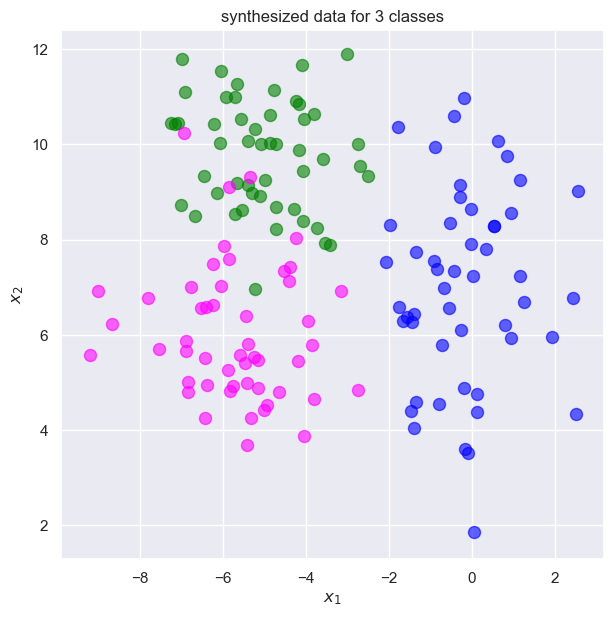

In [2]:
#
#Pseudo-random number generators work by performing some operation on a value. 
#Generally this value is the previous number generated by the generator. 
#However, the first time you use the generator, there is no previous value.
#
#Seeding a pseudo-random number generator gives it its first "previous" value. 
#Each seed value will correspond to a sequence of generated values for a given random number generator. 
#That is, if you provide the same seed twice, you get the same sequence of numbers twice.
#
#
np.random.seed(100)

n_per_class = 50
colors = ['green', 'blue', 'magenta']

mean1 = [-5, 10]
cov1 = [[1.5, 0], [0, 1.5]]
mean2 = [0, 7]
cov2 = [[1.5, 0], [0, 3]]
mean3 = [-6, 6]
cov3 = [[2, 0], [0, 1.5]]

means = [mean1, mean2, mean3]
covs = [cov1, cov2, cov3]

#
#np.random.multivariate_normal()
#Draw random samples from a multivariate normal distribution.
#
#The multivariate normal, multinormal or Gaussian distribution is 
#a generalization of the one-dimensional normal distribution to higher dimensions. 
#Such a distribution is specified by its mean and covariance matrix. 
#These parameters are analogous to the mean (average or “center”) 
#and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.
#For detail, go to https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.multivariate_normal.html 
#

x11, x12 = np.random.multivariate_normal(means[0], covs[0], n_per_class).T
x21, x22 = np.random.multivariate_normal(means[1], covs[1], n_per_class).T
x31, x32 = np.random.multivariate_normal(means[2], covs[2], n_per_class).T

scale = 75
alpha = 0.6

fig, ax  = plt.subplots(figsize=(7, 7), dpi=100)
ax.scatter(x11, x12, alpha=alpha, color=colors[0], s=scale)
ax.scatter(x21, x22, alpha=alpha, color=colors[1], s=scale)
ax.scatter(x31, x32, alpha=alpha, color=colors[2], s=scale)

ax.set_title("synthesized data for 3 classes")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

Then we have to instantiate a kNN classifier from sklearn. Below is how we define K and create kNN classifier.

In [3]:
from sklearn import neighbors

weights='uniform'
k = 15
knn = neighbors.KNeighborsClassifier(k,weights=weights)

We now use the above data to create the kNN classifier. We need to pass one array as training features and one array as training labels to the `knn` object. Therefore we have to put all the attributes together (also class labels).

In [4]:
#
#np.r_
#This is used to concatenate any number of array slices along row (first) axis. 
#This is a simple way to create numpy arrays quickly and efficiently. 
#For detail, go to https://docs.scipy.org/doc/numpy/reference/generated/numpy.r_.html
#
#concatenate all the arrays along row axis  
x1 = np.r_[x11, x21, x31]
x2 = np.r_[x12, x22, x32]
#
#np.c_
#np.c_ is another way of doing array concatenate.
#It translates slice objects to concatenation along the second axis.
#e.g. >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
#array([[1, 2, 3, 0, 0, 4, 5, 6]])
#
##concatenate all the arrays along column axis  
X_train = np.c_[x1, x2]

In [5]:
#general Y_train label output for the X_train input: 50 zero (class 0), 50 one (class 1) and 50 two (class 2)
Y_train = np.r_[0*np.ones(n_per_class), 1*np.ones(n_per_class), 2*np.ones(n_per_class)]

Now we can fit the model

In [6]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

Now we will see how kNN classifies a point.

In [7]:
#if set k=1, only one nearest neighbor
k = 1
knn = neighbors.KNeighborsClassifier(k)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [8]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['green', 'blue', 'magenta'])

[0.]


Text(0.5, 1.0, '3-Class classification (k = 5)\n Red point is predicted as class green')

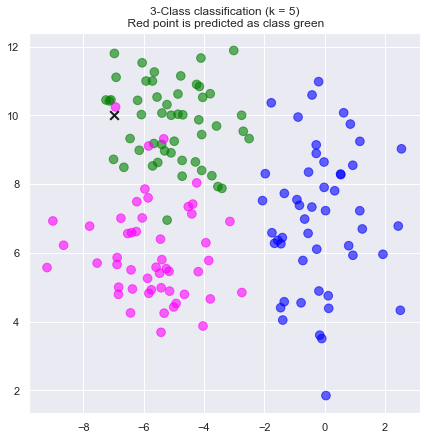

In [46]:
fig,ax = plt.subplots(figsize=(7, 7))

#plot the classification of X_train
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.title("3-Class classification (k = {})".format(k))

#create an input to predict its label
X_test = [[-7, 10]]
Y_pred = knn.predict(X_test)

#to check the predicted label for the X_test
print(Y_pred)

#plot the test input
ax.scatter(X_test[0][0], X_test[0][1], marker="x", s=scale, lw=2, c='k')
#as you can see, the test input is displayed in color 'k'
#how could it be colored based on the prediction Y_pred?

ax.set_title("3-Class classification (k = {})\n Red point is predicted as class {}".format(k, colors[Y_pred.astype(int)[0]]))

#plot the test input using the predicted color
#ax.scatter(X_test[0][0], X_test[0][1], marker="x", s=scale, lw=2, c=colors[Y_pred.astype(int)[0]])

<a id = "db"></a>

### <span style="color:#0b486b">1.2 Decision Boundry</span> 

kNN effectively partitions the feature space into different sets and assigns the same class label to points belonging to the same partition. This partitioning changes as we change k. We illustrate this below. As you see bigger values of k, partition the space more smoothly.

In [10]:
from matplotlib.colors import ListedColormap

Text(0.5, 1.0, '3-Class classification (k = 15)')

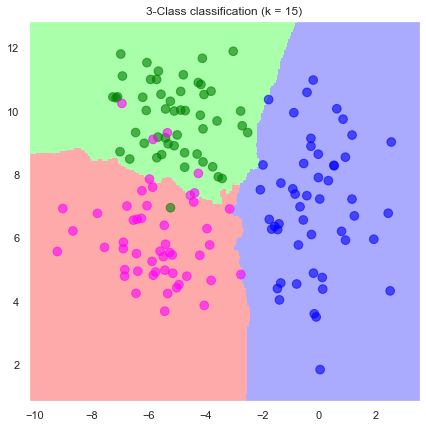

In [11]:
k = 15
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

# step size in the mesh
h = 0.05

# Create colour maps
cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF', '#FFAAAA'])
cmap_bold = ListedColormap(['green', 'blue', 'magenta'])

x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

# Plot also the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

Now we will investigate the effect of `'k'` on decision boundaries. Lets train a classifier with `k=1` which means we only use the label of the closest point to predict the label of a test point.

Text(0.5, 1.0, '3-Class classification (k = 1)')

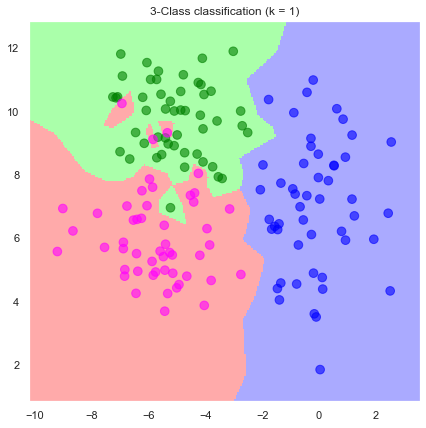

In [12]:
k = 1
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

Text(0.5, 1.0, '3-Class classification (k = 2)')

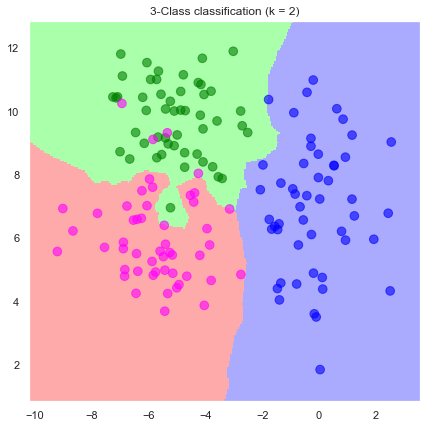

In [13]:
k = 2
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

Text(0.5, 1.0, '3-Class classification (k = 3)')

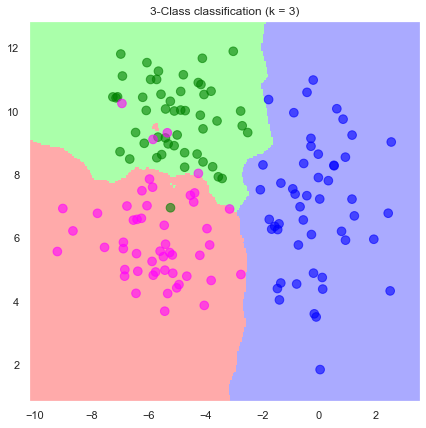

In [14]:
k = 3
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

Text(0.5, 1.0, '3-Class classification (k = 5)')

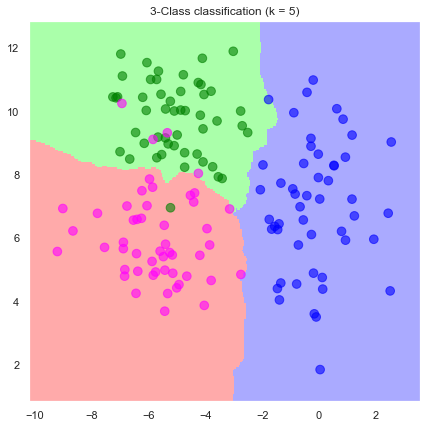

In [15]:
k = 5
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

#### 1.2.1 Prediction

Play with the `X_test` and `k` to see how the classifier behaves.

Text(0.5, 1.0, '3-Class classification (k = 5)\n Red point is predicted as class green')

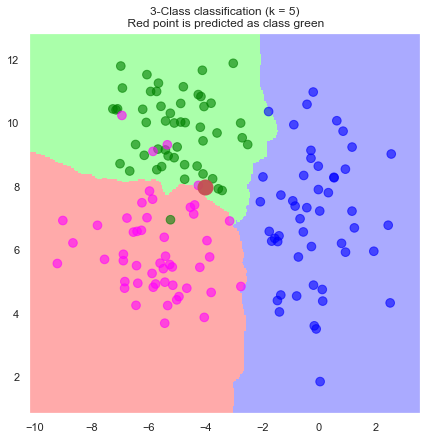

In [16]:
k = 5
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

X_test = [[-4, 8]]
Y_pred = knn.predict(X_test)
ax.scatter(X_test[0][0], X_test[0][1], alpha=0.95, color='r', s=3*scale)

ax.set_title("3-Class classification (k = {})\n Red point is predicted as class {}".format(k, colors[Y_pred.astype(int)[0]]))

Now instead of predicting the class label for one point, we use our model to predict the labels of multiple points.

First we generate some test data from the first class. This way we know the true class labels. Then we can use the `kNN` classifier to predict labels for the test data and get the predicted class labels. A measure of  accuracy for the classifier can be defined by comparing the true and predicted labels.

In [17]:
n_test = 100
X1_test, X2_test = np.random.multivariate_normal(mean1, cov1, n_test).T
Y_true = 0 * np.ones(n_test)

In [18]:
X_test = np.c_[X1_test, X2_test]

In [19]:
Y_pred = knn.predict(X_test)

In [20]:
Y_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

How many times the classifier predicts the labels correctly?

In [21]:
Y_pred == Y_true

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

 Accuracy:

In [22]:
(sum(Y_pred == Y_true) + 0.0) / n_test

0.96

**Exercise**: Repeat the previous experiment with a classifier which has been trained with a different `k`.

## <span style="color:#0b486b">2. Naive Bayes Classifier</span> 


Naive Bayes is one of the most practical classification machine learning algorithms. It is  based on Bayes’ Theorem with an assumption of independence among predictors. It is: 

* fast
* good performance
* simple yet very effective
* robust to irrelative features

So why is it called naive?

Because it does not consider the dependency between features and assume all features are independent of each other which is not the case in reality. This is a naive assumption, hence the name.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods. There are many interesting tutorials explaining the Bayes' Theorem for beginners via google, eg. [https://dzone.com/articles/naive-bayes-tutorial-naive-bayes-classifier-in-pyt](https://dzone.com/articles/naive-bayes-tutorial-naive-bayes-classifier-in-pyt). 


The accuracy is very good although with this naive assumption. A famous example of NB usage is spam filtering.

<a id = "nbc"></a>
### <span style="color:#0b486b">2.1 NBC by Example</span> 

We assume we have collected the below data over the past 5 days. Based on this data, can we predict if our subject will play in a setting like:

    outlook  = overcast
    temp     = hot
    humidity = normal
    windy    = no

<!-- <img src="nb_data.png" width="800"> -->
<img src="./images/p06/nb_data.png" width="800">
<br />

First we have to find a representation for our data. We can construct a dictionary to convert stings into numbers and then save them in a dataframe. 

    outlook: sunny=0, overcast=1, rainy=2
    temp: hot=0, mild=1, cool=2
    humidity: normal=0, high=1
    wind: no=0, yes=1
    play: no=0, yes=1

In [23]:
from __future__ import division

import numpy as np
import pandas as pd

In [24]:
data = {
    'outlook': [0, 1, 2, 0, 1],
    'temp'   : [0, 1, 2, 1, 0],
    'humid'  : [0, 0, 1, 0, 1],
    'wind'   : [0, 0, 1, 1, 0],
    'play'   : [1, 1, 0, 0, 0,]    
}

df = pd.DataFrame(data)

Now we use Bayes rule to construct a Naive Bayes classifier. We can write:

$$Pr\left(p|o,t,h,w\right)\propto Pr\left(p\right)Pr(o|p)Pr(t|p)Pr(h|p)Pr(w|p)$$

To calculate $Pr(p)$ we use marginal probablity.

In [25]:
def marginal_prob(df, col):
    ll = [(ss, (df[col] == ss).sum()) for ss in set(df[col])]
    total_count = [b for a,b in ll]
    total_count = sum(total_count)
    
    ll2 = [(a, b/total_count) for a, b in ll]
    return dict(ll2)

To calculate probability of a feature given the class (play) we use conditinoal probability.

In [26]:
def conditional_prob(df, f, c, val):
    df2 = df[df[c] == val][f]
    ll = [[ss, (df2 == ss).sum()] for ss in set(df2)]
    total_count = [b for a,b in ll]
    total_count = sum(total_count)
    
    ll2 = [(a, b/total_count) for a, b in ll]
    return dict(ll2)

Now we can use Bayes rule:

In [27]:
#outlook: sunny=0, overcast=1, rainy=2
#temp: hot=0, mild=1, cool=2
#humidity: normal=0, high=1
#wind: no=0, yes=1
#play: no=0, yes=1

#Given:     
#outlook  = overcast
#temp     = hot
#humidity = normal
#windy    = no

o = 1
t = 0
h = 0
w = 0

c = 0
p0 = marginal_prob(df, 'play')[c] * conditional_prob(df, 'outlook', 'play', c)[o] * conditional_prob(df, 'temp', 'play', c)[t] \
* conditional_prob(df, 'humid', 'play', c)[h] * conditional_prob(df, 'wind', 'play', c)[w]

c = 1
p1 = marginal_prob(df, 'play')[c] * conditional_prob(df, 'outlook', 'play', c)[o] * conditional_prob(df, 'temp', 'play', c)[t] \
* conditional_prob(df, 'humid', 'play', c)[h] * conditional_prob(df, 'wind', 'play', c)[w]

# normalizing
p_sum = p0 + p1
p0 /= p_sum
p1 /= p_sum

print ("probability of not playing: {}".format(p0))
print ("probability of playing    : {}".format(p1))

probability of not playing: 0.06896551724137928
probability of playing    : 0.9310344827586208


<a id = "rf1"></a>

## 3. Random Forest

Random forests are an example of an *ensemble learner* built on decision trees.
For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classifying or labeling objects: you simply ask a series of questions designed to zero-in on the classification.

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

Download [fig_code.zip](fig_code.zip) from week6 folder on Clouddeakin or [https://github.com/gaoshangdeakin/SIT384-libs/](https://github.com/gaoshangdeakin/SIT384-libs/). Extract and save the fig_code folder in the same folder where your script is.

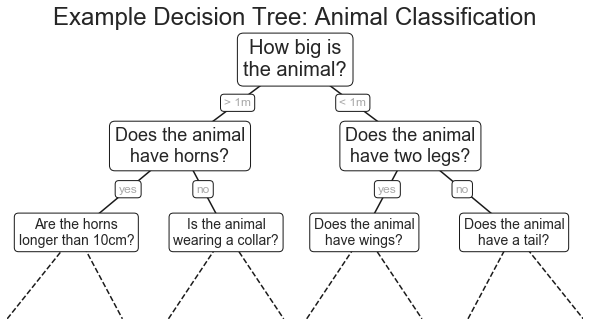

In [30]:
import fig_code
fig_code.plot_example_decision_tree()

The binary splitting makes this extremely efficient.
As always, though, the trick is to *ask the right questions*.
This is where the algorithmic process comes in: in training a decision tree classifier, the algorithm looks at the features and decides which questions (or "splits") contain the most information.

<a id = "rf2"></a>

### 3.1 Creating a Decision Tree

Here's an example of a decision tree classifier in scikit-learn. We'll start by defining some two-dimensional labeled data:

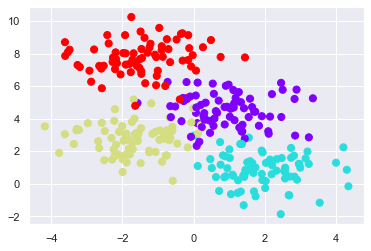

In [53]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [54]:
# We have some convenience functions in the repository that help 
from fig_code import visualize_tree, plot_tree_interactive
#from IPython.html.widgets import interact

# Now using IPython's ``interact`` (available in IPython 2.0+, and requires a live kernel) we can view the decision tree splits:
plot_tree_interactive(X, y);

#interact(fit_randomized_tree, random_state=[0, 100]);

interactive(children=(Dropdown(description='depth', options=(1, 5), value=1), Output()), _dom_classes=('widget…

Notice that at each increase in depth, every node is split in two **except** those nodes which contain only a single class.
The result is a very fast **non-parametric** classification, and can be extremely useful in practice.

**Question: Do you see any problems with this?**

<a id = "rf3"></a>

### 3.2 Decision Trees and over-fitting

One issue with decision trees is that it is very easy to create trees which **over-fit** the data. That is, they are flexible enough that they can learn the structure of the noise in the data rather than the signal! For example, take a look at two trees built on two subsets of this dataset:

<Figure size 432x288 with 0 Axes>

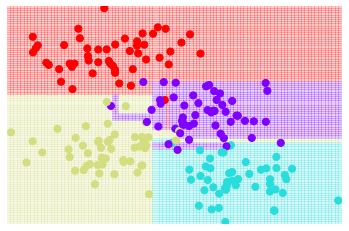

<Figure size 432x288 with 0 Axes>

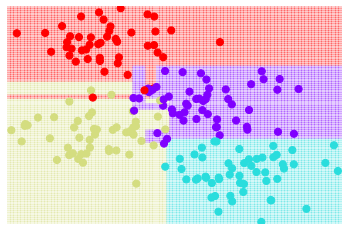

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

The details of the classifications are completely different! That is an indication of **over-fitting**: when you predict the value for a new point, the result is more reflective of the noise in the model rather than the signal.

<a id = "rf4"></a>

### 3.3 Ensembles of Estimators: Random Forests

One possible way to address over-fitting is to use an **Ensemble Method**: this is a meta-estimator which essentially averages the results of many individual estimators which over-fit the data. Somewhat surprisingly, the resulting estimates are much more robust and accurate than the individual estimates which make them up!

One of the most common ensemble methods is the **Random Forest**, in which the ensemble is made up of many decision trees which are in some way perturbed.

There are volumes of theory and precedent about how to randomize these trees, but as an example, let's imagine an ensemble of estimators fit on subsets of the data. We can get an idea of what these might look like as follows:

In [34]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

See how the details of the model change as a function of the sample, while the larger characteristics remain the same!
The random forest classifier will do something similar to this, but use a combined version of all these trees to arrive at a final answer:

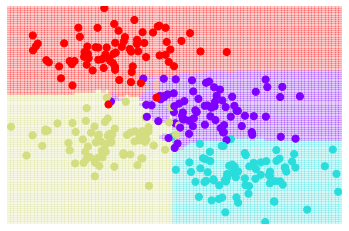

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
visualize_tree(clf, X, y, boundaries=False);

By averaging over 100 randomly perturbed models, we end up with an overall model which is a much better fit to our data!

*(Note: above we randomized the model through sub-sampling... Random Forests use more sophisticated means of randomization, which you can read about in, e.g. the [scikit-learn documentation](http://scikit-learn.org/stable/modules/ensemble.html#forest)*)

<a id = "rf5"></a>

### 3.4 Random Forest Regressor

Above we were considering random forests within the context of classification.
Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is ``sklearn.ensemble.RandomForestRegressor``.

Let's quickly demonstrate how this can be used:

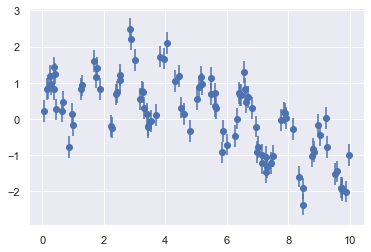

In [36]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

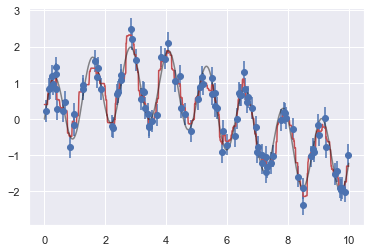

In [37]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us even specifying a multi-period model!

Tradeoff between simplicity and thinking about what your data is.

Feature engineering is important, need to know your domain: Fourier transform frequency distribution.

<a id = "rf6"></a>

### 3.5 Random Forest Limitations

The following data scenarios are not well suited for random forests:
* y: lots of 0, few 1
* Structured data like images where a neural network might be better
* Small data size which might lead to overfitting
* High dimensional data where a linear model might work better

---
## <span style="color:#0b486b">4. Confidence Interval</span> 

<a id = "popsample"></a>

### <span style="color:#0b486b">4.1 Population vs Sample</span> 

The main difference between population and sample comes down to how observations are assigned to dataset. A **population** includes all of the elements from the dataset. A **sample** consists of one or more observations from the population. In other words **population** is the entire collection of the desired measurable characteristic that we would have, if we could collect it. 

For example if suppose we want to find the average height of 2nd grade students in Australia. The population would be all the students who are studying in 2nd grade in Australia. But most likely we can not measure the height of all Australian 2nd grade students. It is not feasible. So what do we do? **We sample!**. We collect the height of some of Australian 2nd graders and based on that, we **estimate** the average height of the population (all of Australian 2nd grade students). The sample could be 2nd grade students in one class of one school, or multiple classes of multiple schools in one state, or  multiple schools in multiple states, or etc.

A measurable statistic of a population (such as mean) is called a **parameter**. But a measurable characteristic of a sample is called **statistic**.

----
<a id = "ci"></a> 

### <span style="color:#0b486b">4.2 Confidence Interval</span> 

As stated in previous section, population parameter is unknown. Confidence interval is a type of interval estimate of a population parameter calculated from sample statistics. It is an interval estimate combined with a probability.

For the aforementioned example, it means that without collecting the height of all Aussie 2nd graders, we can estimate the average height by collecting a sample and using the below formula:


$$Confidence\, Interval=\bar{X}\pm z\frac{s}{\sqrt{n}}$$

$s$ is the sample standard deviation, $n$ is the sample size, and $z$ is often read from a table.

    confidence level (%)     z
         
            70              1.04 
            75              1.15
            80              1.28 
            85              1.44 
            90              1.645
            92              1.75
            95              1.96
            96              2.05
            98              2.33
            99              2.58

Now lets use an example to clarify this concept.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

%matplotlib inline
sns.set()

First we create a population. Please note that we do not use the population in our computation. We use samples from it.

In [39]:
mu, sigma = 10, 2
n_population = 10000
population = np.random.normal(mu, sigma, n_population)

Text(0.5, 1.0, 'population histogram, $\\mu=10$, $\\sigma=2$ ')

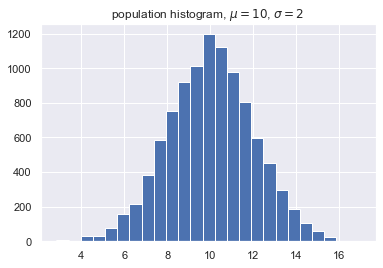

In [40]:
fig, ax = plt.subplots()
ax.hist(population, bins=25)
ax.set_title(r"population histogram, $\mu={}$, $\sigma={}$ ".format(mu, sigma))

Now we sample multiple times from this population.

In [41]:
n_trials = 1000
sample_size = 500
samples = np.zeros([n_trials, sample_size])
sample_std = np.zeros(n_trials)
sample_mean = np.zeros(n_trials)

for i in range(n_trials):
    samples[i] = np.random.choice(population, size=sample_size, replace=False)
    sample_mean[i] = samples[i].mean()
    sample_std[i] = samples[i].std()

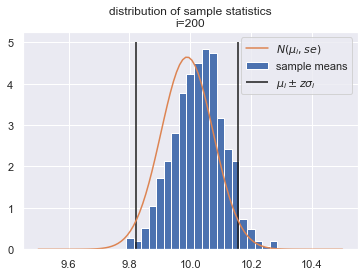

In [55]:
i = 200
se = sample_std[i] / np.sqrt(sample_size)
dist = ss.distributions.norm(sample_mean[i], se)
z = 1.96

x = np.linspace(9.5, 10.5, 100)
y = dist.pdf(x)

fig, ax = plt.subplots()
    
ax.hist(sample_mean, density=True, bins=20, label='sample means')
ax.plot(x, y, label="$N(\mu_{i},se)$")
ax.vlines(sample_mean[i] + z*se, 0, 5, label='$\mu_i \pm z\sigma_i$')
ax.vlines(sample_mean[i] - z*se, 0, 5)

ax.set_title("distribution of sample statistics\ni={}".format(i))
ax.legend()


# <span style="color:#0b486b">Tasks</span>

Try the provided examples and get yourself familiar with sample code before attempting portolio tasks.

Please show your attempt to your tutor before you leave the lab, or email your files to your coordinator if you are an off-campus student.

# <span style="color:#0b486b">Summary</span>

In this session we have covered: 
 - different supervised learning algorithms.
 - how to apply the supervised learning algorithms in Python.